In [1]:
import tensorflow as tf
import numpy as np
import cv2

In [2]:
filename="opencv_frame_.png"

In [3]:
# from IPython.display import Image
# Image(filename,width=300,height=224)

In [4]:
from tensorflow.keras.preprocessing import image
img= image.load_img(filename,target_size=(224,224))

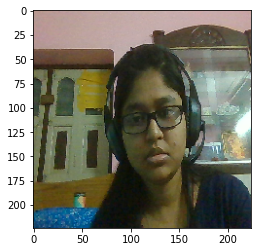

In [5]:
from matplotlib import pyplot as plt
plt.imshow(img)

In [6]:
mobile=tf.keras.applications.mobilenet.MobileNet()

In [7]:
mobile=tf.keras.applications.mobilenet_v2.MobileNetV2() # For modified version # 90% accuracy

In [8]:
resized_img= image.img_to_array(img)
final_image = np.expand_dims(resized_img,axis=0)
final_image = tf.keras.applications.mobilenet.preprocess_input(final_image)

In [9]:
resized_img.shape

(224, 224, 3)

In [10]:
final_image.shape

(1, 224, 224, 3)

In [11]:
predictions = mobile.predict(final_image)

In [12]:
from tensorflow.keras.applications import imagenet_utils


In [13]:
results=imagenet_utils.decode_predictions(predictions)
print(results)

[[('n04209239', 'shower_curtain', 0.15831558), ('n04209133', 'shower_cap', 0.051462922), ('n04162706', 'seat_belt', 0.025894638), ('n04127249', 'safety_pin', 0.02529702), ('n04355933', 'sunglass', 0.023182878)]]


My Code : 

In [14]:
car_type_dataset=['racer','minivan','beach_wagon','cab','car_wheel','van','pickup','sports_car','convertible','coup',
'jeep','4x4','truck','limousime','ambulance','streetcar','police_van','stretcher']


In [15]:
for l in results:
    for i in l:
        # print(i)
        for car_name in range(len(car_type_dataset)):
            if car_type_dataset[car_name] in i[1]:
                # print(i[1])
                img = cv2.imread('car.jpg')
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))